In [1]:
import os
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.image import imread
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

In [2]:
#separating the images into training and testing lists which contains the path of the images
data_path = "lfwcropped"
train, test = [], [] 
folders = sorted(os.listdir(data_path))
for folder in folders:
    files = [os.path.join(data_path, folder, path) for path in os.listdir(os.path.join(data_path, folder))]
    if len(files) == 1:
        test.extend(files)
    else:
        train.extend(files[:int(len(files)/2)])
        test.extend(files[int(len(files)/2):])

In [3]:
#resizing the train images
width  = 100
height = 100

for i in range(len(train)):
    img = Image.open(train[i])  
    img = img.resize((width, height), Image.ANTIALIAS)
    img.save(train[i])

In [4]:
training_image_vector= np.ndarray(shape=(len(train), height*width), dtype=np.float64)
for i in range(len(train)):
    img = cv2.imread(train[i],0)
    training_image_vector[i,:] = np.array(img, dtype='float64').flatten()
print("Size of training image vector:",training_image_vector.shape)
print("Training image vector:",training_image_vector)

('Size of training image vector:', (4174L, 10000L))
('Training image vector:', array([[142., 158., 144., ..., 180., 176., 122.],
       [140., 153., 154., ..., 178., 157., 135.],
       [146., 162., 153., ..., 163., 157., 105.],
       ...,
       [153., 146., 154., ..., 128., 131., 138.],
       [148., 158., 145., ..., 124., 140., 206.],
       [147., 151., 143., ..., 116., 132., 189.]]))


('Size of average face vector:', (10000L,))
('Average face vector:', array([146.05055103, 153.49041687, 151.1813608 , ..., 136.35481552,
       139.94034499, 169.90680402]))
Average face:


C:\Users\Priyanka\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


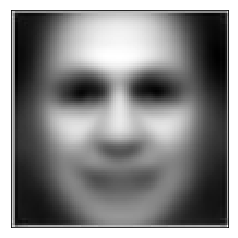

In [5]:
average_face_vector = np.zeros(height*width)
for i in training_image_vector:
    average_face_vector = np.add(average_face_vector,i)
average_face_vector = np.divide(average_face_vector,float(len(train))).flatten()
print("Size of average face vector:",average_face_vector.shape)
print("Average face vector:",average_face_vector)
print("Average face:")
plt.imshow(average_face_vector.reshape(height, width), cmap='gray')#plotting the average face generated
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')#removing the labels from the plot
plt.show()

In [6]:
normalised_training_vector = np.ndarray(shape=(len(train), height*width))
for i in range(len(train)):
    normalised_training_vector[i] = np.subtract(training_image_vector[i],average_face_vector)
print("Size of normalised face vector:",normalised_training_vector.shape)
print("Normalised face vector:",normalised_training_vector)

('Size of normalised face vector:', (4174L, 10000L))
('Normalised face vector:', array([[-4.05055103e+00,  4.50958313e+00, -7.18136080e+00, ...,
         4.36451845e+01,  3.60596550e+01, -4.79068040e+01],
       [-6.05055103e+00, -4.90416866e-01,  2.81863920e+00, ...,
         4.16451845e+01,  1.70596550e+01, -3.49068040e+01],
       [-5.05510302e-02,  8.50958313e+00,  1.81863920e+00, ...,
         2.66451845e+01,  1.70596550e+01, -6.49068040e+01],
       ...,
       [ 6.94944897e+00, -7.49041687e+00,  2.81863920e+00, ...,
        -8.35481552e+00, -8.94034499e+00, -3.19068040e+01],
       [ 1.94944897e+00,  4.50958313e+00, -6.18136080e+00, ...,
        -1.23548155e+01,  5.96550072e-02,  3.60931960e+01],
       [ 9.49448970e-01, -2.49041687e+00, -8.18136080e+00, ...,
        -2.03548155e+01, -7.94034499e+00,  1.90931960e+01]]))


In [14]:
cov_matrix = np.cov(normalised_training_vector.T)
cov_matrix_1=np.cov(normalised_training_vector)
print("Size of covariance matrix:",cov_matrix.shape)
print("Covariance matrix:",cov_matrix)

('Size of covariance matrix:', (10000L, 10000L))
('Covariance matrix:', array([[  39.44700065,  -27.10411645,   -1.61281264, ...,   12.24182457,
          10.8472531 ,  -13.42255827],
       [ -27.10411645,   42.45557553,   -9.4776529 , ...,   -9.62480407,
          -8.9213722 ,    9.20363579],
       [  -1.61281264,   -9.4776529 ,   37.68600764, ...,   -3.50793083,
          -1.65081264,    6.00372618],
       ...,
       [  12.24182457,   -9.62480407,   -3.50793083, ...,  513.17745464,
         349.67082412, -274.37095058],
       [  10.8472531 ,   -8.9213722 ,   -1.65081264, ...,  349.67082412,
         325.44743492, -102.37340182],
       [ -13.42255827,    9.20363579,    6.00372618, ..., -274.37095058,
        -102.37340182,  615.51275983]]))


In [15]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
eigenvalues_1, eigenvectors_1, = np.linalg.eig(cov_matrix_1)
print("Eigenvectors of covariance matrix:\n",eigenvectors)
print("\nEigenvalues of covariance matrix:\n",eigenvalues)

('Eigenvectors of covariance matrix:\n', array([[ 8.19841162e-04+0.00000000e+00j,  2.20531729e-04+0.00000000e+00j,
         1.34813807e-03+0.00000000e+00j, ...,
        -2.31594006e-03+0.00000000e+00j,  1.45134599e-03+5.40808206e-05j,
         1.45134599e-03-5.40808206e-05j],
       [-5.78069235e-04+0.00000000e+00j, -1.65108464e-04+0.00000000e+00j,
        -9.97193719e-04+0.00000000e+00j, ...,
         8.91340763e-06+0.00000000e+00j, -2.42435155e-05-1.47820434e-05j,
        -2.42435155e-05+1.47820434e-05j],
       [-1.98780334e-04+0.00000000e+00j, -2.20686119e-04+0.00000000e+00j,
        -3.66217119e-04+0.00000000e+00j, ...,
        -8.38924410e-06+0.00000000e+00j,  5.66975641e-05-7.65891988e-06j,
         5.66975641e-05+7.65891988e-06j],
       ...,
       [ 2.47834002e-03+0.00000000e+00j,  5.76516894e-03+0.00000000e+00j,
         2.25944008e-03+0.00000000e+00j, ...,
        -5.85954341e-03+0.00000000e+00j,  5.07744955e-03-1.50992971e-03j,
         5.07744955e-03+1.50992971e-03j],
   

In [16]:
idx = eigenvalues.argsort()[::-1]   
eigvalues_sort = eigenvalues[idx]
eigvectors_sort = eigenvectors[:,idx]
idx_1 = eigenvalues_1.argsort()[::-1]   
eigvalues_sort_1 = eigenvalues_1[idx_1]
eigvectors_sort_1 = eigenvectors_1[:,idx_1]

In [17]:
k = 100
top_eigenvectors_transpose = np.array(eigvectors_sort[:k])
top_eigenvectors_transpose_1 = np.array(eigvectors_sort_1[:k])
print("Size of the top k eigenvectors",top_eigenvectors_transpose.shape)
print("Top k eigenvectors:\n",top_eigenvectors_transpose)

('Size of the top k eigenvectors', (100L, 10000L))
('Top k eigenvectors:\n', array([[ 8.19841162e-04+0.j        ,  2.20531729e-04+0.j        ,
         1.34813807e-03+0.j        , ...,  3.11035336e-03-0.00151698j,
         3.11035336e-03+0.00151698j,  8.44435603e-03+0.j        ],
       [-5.78069235e-04+0.j        , -1.65108464e-04+0.j        ,
        -9.97193719e-04+0.j        , ..., -4.32030694e-03-0.00510731j,
        -4.32030694e-03+0.00510731j,  6.43464934e-03+0.j        ],
       [-1.98780334e-04+0.j        , -2.20686119e-04+0.j        ,
        -3.66217119e-04+0.j        , ..., -4.94791820e-03+0.00027954j,
        -4.94791820e-03-0.00027954j, -2.17469955e-03+0.j        ],
       ...,
       [-1.18344082e-03+0.j        , -1.67215198e-03+0.j        ,
        -1.10096256e-03+0.j        , ..., -3.77888881e-03-0.00354998j,
        -3.77888881e-03+0.00354998j,  6.11277090e-03+0.j        ],
       [-6.14543263e-04+0.j        , -8.83958863e-04+0.j        ,
        -6.20609759e-04+0.j  

In [22]:
proj_data = np.dot(training_image_vector.transpose(),top_eigenvectors_transpose_1.transpose())
proj_data = proj_data.transpose()

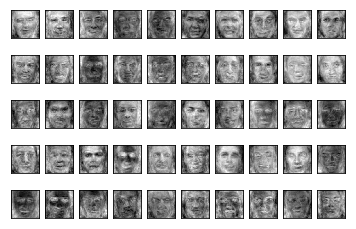

In [23]:
for i in range(50):
    img = proj_data[i].reshape(height,width)
    plt.subplot(5,10,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')

plt.show()

In [24]:
for i in range(len(test)):
    img = Image.open(test[i]) 
    img = img.resize((width, height), Image.ANTIALIAS)
    img.save(test[i])

In [26]:
testing_image_vector= np.ndarray(shape=(len(test), height*width), dtype=np.float64)
for i in range(len(test)):
    img = cv2.imread(test[i],0)
    testing_image_vector[i,:] = np.array(img, dtype='float64').flatten()
print("Size of the testing image vector:",np.shape(testing_image_vector))
print("Testing image vector:\n",testing_image_vector)


('Size of the testing image vector:', (8663L, 10000L))
('Testing image vector:\n', array([[145., 157., 145., ..., 129., 117., 126.],
       [140., 153., 154., ..., 151., 152., 188.],
       [135., 153., 158., ..., 136., 137., 176.],
       ...,
       [140., 163., 151., ..., 122., 139., 206.],
       [133., 167., 168., ..., 168., 154., 150.],
       [136., 158., 155., ..., 106., 127., 202.]]))


In [27]:
#testing image weights
test_weights = np.ndarray(shape=(len(test), 100))
for i in range(len(test)):
    test_weights[i] = np.dot(top_eigenvectors_transpose,(np.subtract(testing_image_vector[i],average_face_vector)))
print("Size of testing weights:",test_weights.shape)
print("Testing weights:",test_weights)

C:\Users\Priyanka\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


('Size of testing weights:', (8663L, 100L))
('Testing weights:', array([[ -1.68041285,  12.02067978,  45.02757269, ...,  48.50664988,
         91.54449854,  17.65439741],
       [-37.32025436,   1.51339291, -98.5058359 , ...,  27.10997639,
         23.57506927, -21.64102868],
       [ -3.66647827, -41.30149819, -58.15167969, ..., -22.95180106,
        -39.69178534, -13.00573215],
       ...,
       [ -1.11992943,  59.77167772, -78.35481243, ...,  24.07393607,
         36.87113043,  16.67365473],
       [ 25.47083951,   8.16179824,  40.57648209, ...,  20.35523063,
         30.78143571,  21.53200322],
       [ 30.79515973, -60.92361956, -51.40109404, ..., -23.25540212,
        -12.71724064, -20.87256207]]))


In [28]:
threshold = 270
tp, tn, fp, fn = 0, 0, 0, 0
for i in range(len(test_weights)-1):
    for j in range(i+1,len(test_weights)):
        dist = distance.euclidean(test_weights[i], test_weights[j])
        #print(dist)
        if(dist < threshold):
            if test[i].split(os.sep)[1] == test[j].split(os.sep)[1]:
                #print("Correctly Verified")
                tp += 1
            else:
                fp+=1
        else:
            if test[i].split(os.sep)[1] != test[j].split(os.sep)[1]:
                #print("Correctly Unverified")
                tn += 1
            else:
                fn+=1
        
print("True Positive : ", tp)
print("True Negative : ", tn)
print("False Positive : ", fp)
print("False Negative : ", fn)

# Calculating accuracy
accuracy = ((tp + tn)/float(tp+tn+fp+fn))*100.0
print("Accuracy : ", accuracy)

('True Positive : ', 8085)
('True Negative : ', 35303306)
('False Positive : ', 2157596)
('False Negative : ', 50466)
('Accuracy : ', 94.11488754913351)


25


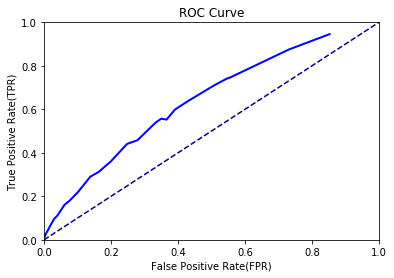

In [15]:
fpr = [0.002,0.004,0.006,0.011,0.018,0.030,0.040,0.061,0.077,0.102,0.138,0.163,0.199,0.248,0.279,0.333,0.350,0.366,0.391,0.431,0.510,0.548,0.551,0.731,0.853]
tpr = [0.014,0.022,0.029,0.043,0.063,0.096,0.112,0.161,0.181,0.221,0.290,0.312,0.360,0.441,0.458,0.539,0.557,0.553,0.599,0.639,0.712,0.743,0.743,0.875,0.946]
print len(fpr)
plt.figure()
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.autoscale(enable=True, axis='both', tight='None')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.plot(fpr, tpr, color='blue', lw=2)
plt.show()



